### Data Loading

In [1]:
from feature_data_from_mat import get_high_gamma_data
import numpy as np

In [2]:
hg_trace, hg_map, phon_labels = get_high_gamma_data('../data/S14/S14_HG_sigChannel_goodTrials.mat')

In [3]:
print(hg_trace.shape)
print(np.mean(hg_trace, axis=0).shape)
print(np.mean(np.mean(hg_trace, axis=0), axis=1).shape)

(144, 200, 111)
(200, 111)
(200,)


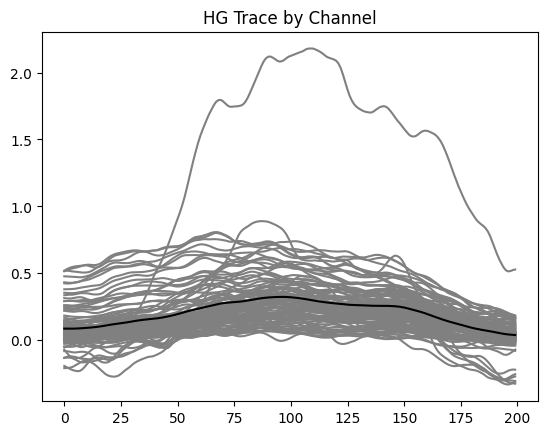

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.mean(hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

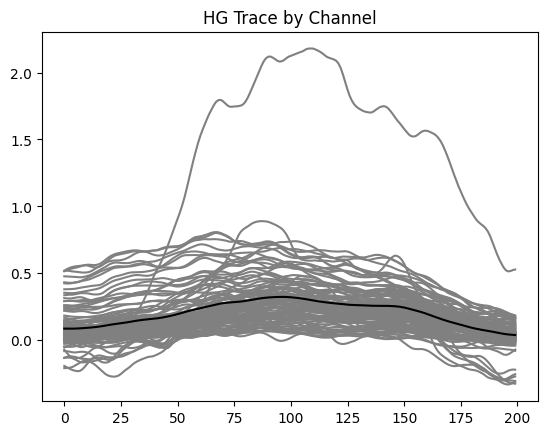

In [5]:
plt.figure()
plt.plot(np.mean(hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

### Data Preprocessing

In [6]:
from sequence_processing import pad_sequence_teacher_forcing

n_output = 10

In [7]:
X = hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X1 = S14_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X_prior, y, prior_labels, seq_labels = pad_sequence_teacher_forcing(phon_labels, n_output)  # first 2 outputs one-hot encoded

### MixUp Testing

In [13]:
from sklearn.model_selection import ShuffleSplit
from mixup_generation import generate_mixup

In [15]:
data_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=2)
train_idx, test_idx = next(data_split.split(X))
X_train, X_test = X[train_idx], X[test_idx]
X_prior_train, X_prior_test = X_prior[train_idx], X_prior[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
seq_labels_train, seq_labels_test = seq_labels[train_idx], seq_labels[test_idx]

In [16]:
mix_X, mix_X_prior, mix_y = generate_mixup(X, X_prior, y, seq_labels)
print(f'X shape: {mix_X.shape}')
print(f'X_prior shape: {mix_X_prior.shape}')
print(f'y shape: {mix_y.shape}')

X shape: (278, 200, 111)
X_prior shape: (278, 3, 10)
y shape: (278, 3, 10)


In [17]:
mix_X_train, mix_X_prior_train, mix_y_train = generate_mixup(
                                                X_train, X_prior_train,
                                                y_train, seq_labels_train)
print(f'X_train shape: {mix_X_train.shape}')
print(f'X_prior_train shape: {mix_X_prior_train.shape}')
print(f'y_train shape: {mix_y_train.shape}')

X_train shape: (201, 200, 111)
X_prior_train shape: (201, 3, 10)
y_train shape: (201, 3, 10)
